Tạo hàm sinh dataset phù hợp với mong muốn:

Ở class GenLinear(), nếu không muốn sinh các điểm gây nhiễu, ta có thể gán self.outlier = 0.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GenLinear():

    def __init__(self):
        self.n = 50
        self.outlier = 0

    def gen(self):
        self.dataset = []
        for i in range(self.n):
            t = (i, random.randint(i + 10, i + 20))
            self.dataset.append(t)

        for i in range(self.outlier):
            t = (random.randint(20, 50), random.randint(0, 10))
            self.dataset.append(t)

        self.n += self.outlier
        self.dataset = np.array(self.dataset)


Import thư viện và sinh dataset.

In [ ]:
import scipy.optimize as so
from scipy.optimize import linprog
import matplotlib.pyplot as plt

Data = GenLinear()
Data.gen()
Data.dataset

array([[ 0, 17],
       [ 1, 14],
       [ 2, 16],
       [ 3, 15],
       [ 4, 19],
       [ 5, 25],
       [ 6, 26],
       [ 7, 22],
       [ 8, 28],
       [ 9, 22],
       [10, 29],
       [11, 24],
       [12, 31],
       [13, 24],
       [14, 24],
       [15, 25],
       [16, 27],
       [17, 35],
       [18, 29],
       [19, 38],
       [20, 34],
       [21, 39],
       [22, 38],
       [23, 38],
       [24, 37],
       [25, 36],
       [26, 44],
       [27, 44],
       [28, 40],
       [29, 39],
       [30, 43],
       [31, 46],
       [32, 47],
       [33, 47],
       [34, 53],
       [35, 54],
       [36, 49],
       [37, 49],
       [38, 56],
       [39, 59],
       [40, 54],
       [41, 54],
       [42, 56],
       [43, 63],
       [44, 54],
       [45, 62],
       [46, 57],
       [47, 58],
       [48, 60],
       [49, 68]])

**Ta có bài toán Quy hoạch tuyến tính (Linear Programming) gốc như sau:**

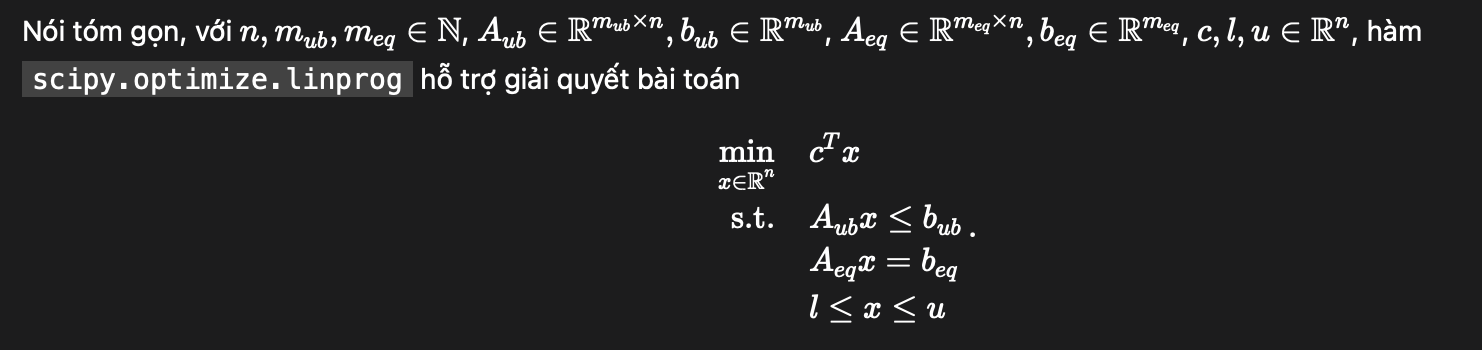

**Ta chuyển đổi bài toàn Linear Regression về bài toán Linear Programming**:

Để đơn giản hoá thuật toán, ta sử dụng hàm số có dạng: y = w<sup>T</sup>x + w<sub>0</sub>. Từ đó, ta chuyển bài toán về dạng:
<br></br>

<div align = 'center'>
minimize:      $\sum_{i} t$<sub>i</sub>

subject to:    t<sub>i</sub> - $|$y<sub>i</sub> - $\sum_{j} {w}$<sub>j</sub>x<sub>ij</sub>$|$ = 0, i = 1, 2,....,n
</div>

<br></br>
(1) Có thể thấy, nghiệm tối ưu của bài toán trên cũng là nghiệm tối ưu của bài toán sau:
<br></br>

<div align = "center";>
minimize:      $\sum_{i} t$<sub>i</sub>

subject to:    -t<sub>i</sub> $\le$ y<sub>i</sub> - $\sum_{j} {w}$<sub>i</sub>x<sub>ij</sub> $\le$ t<sub>i</sub>, i = 1, 2,....,n
</div>

Cụ thể, ta có thể biến đổi bài toán về dạng sau:

minimize: <p align = 'center'> 0w<sub>0</sub> + 0w<sub>1</sub> + .... + 0w<sub>m</sub> + t<sub>1</sub> + .... + t<sub>n</sub></p>
subject to
<div align = 'center'>
w<sub>0</sub> + w<sub>1</sub>x<sub>11</sub> + .... + w<sub>m</sub>x<sub>1m</sub> - t<sub>1</sub> $\le$ y<sub>1</sub>

....

w<sub>0</sub> + w<sub>1</sub>x<sub>n1</sub> + .... + w<sub>m</sub>x<sub>nm</sub> - t<sub>n</sub> $\le$ y<sub>n</sub>

-w<sub>0</sub> - w<sub>1</sub>x<sub>11</sub> - .... - w<sub>m</sub>x<sub>1m</sub> - t<sub>1</sub> $\le$ - y<sub>1</sub>

....

-w<sub>0</sub> - w<sub>1</sub>x<sub>n1</sub> - .... - w<sub>m</sub>x<sub>nm</sub> - t<sub>n</sub> $\le$ - y<sub>n</sub>
</div>

**Lưu ý:** (x<sub>i</sub>, y<sub>i</sub>) là bộ dữ liệu đầu vào. Mục tiêu của chúng ta là tối ưu hoá hàm mục tiêu, từ đó tìm ra giá trị của w<sub>0</sub>, w. Bên cạnh đó, t<sub>i</sub> là biến được thêm vào để có thể đưa ra được nhận xét (1). Do đó, khi thực hiện Linear Programming ta sẽ tìm được giá trị w<sub>0</sub>, w và t<sub>i</sub> tương ứng bộ dữ liệu đầu vào.
<br></br>
Sau khi đã hoàn thiện việc chuyển đổi bài toán Linear Regression ban đầu thành bài toán Linear Programming và mô hình hoá bài toán. Ta có thể bắt đầu cài đặt thuật toán, ở đây ta có thể sử dụng thư viện scipy để cài đặt thuật toán Linear Programming:

"**c**" là một numpy array để lưu các hệ số trước w và x trong hàm mục tiêu.

In [ ]:
c = np.hstack((np.zeros(2), np.ones(Data.n)))
c

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

"**t**" là một numpy array 2D (hay ma trận) lưu giá trị các hệ số trước t<sub>i</sub>.

In [ ]:
t = np.vstack((-np.identity(Data.n), -np.identity(Data.n))) # slack variables
t

array([[-1., -0., -0., ..., -0., -0., -0.],
       [-0., -1., -0., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -1., -0., -0.],
       [-0., -0., -0., ..., -0., -1., -0.],
       [-0., -0., -0., ..., -0., -0., -1.]])

"**x_input**" là một numpy array 2D (hay ma trận) lưu các tuple (1, x) là giá trị các hệ số tương ứng trước w<sub>0</sub> và w<sub>1</sub> và x trong tuple (1, x) là x trong bộ dữ liệu (x<sub>i</sub>, y<sub>i</sub>) được nhập vào.

In [ ]:
x_input = []
for i in Data.dataset:
    x_input.append([1, i[0]])
for i in Data.dataset:
    x_input.append([-1, -i[0]])
x_input = np.array(x_input)
x_input

array([[  1,   0],
       [  1,   1],
       [  1,   2],
       [  1,   3],
       [  1,   4],
       [  1,   5],
       [  1,   6],
       [  1,   7],
       [  1,   8],
       [  1,   9],
       [  1,  10],
       [  1,  11],
       [  1,  12],
       [  1,  13],
       [  1,  14],
       [  1,  15],
       [  1,  16],
       [  1,  17],
       [  1,  18],
       [  1,  19],
       [  1,  20],
       [  1,  21],
       [  1,  22],
       [  1,  23],
       [  1,  24],
       [  1,  25],
       [  1,  26],
       [  1,  27],
       [  1,  28],
       [  1,  29],
       [  1,  30],
       [  1,  31],
       [  1,  32],
       [  1,  33],
       [  1,  34],
       [  1,  35],
       [  1,  36],
       [  1,  37],
       [  1,  38],
       [  1,  39],
       [  1,  40],
       [  1,  41],
       [  1,  42],
       [  1,  43],
       [  1,  44],
       [  1,  45],
       [  1,  46],
       [  1,  47],
       [  1,  48],
       [  1,  49],
       [ -1,   0],
       [ -1,  -1],
       [ -1,

"**A_ub**" là một numpy array 2D (hay ma trận) được tổng hợp từ 2 ma trận **x_input** và **t** trước đó.

In [ ]:
A_ub = np.hstack((x_input, t))
A_ub

array([[  1.,   0.,  -1., ...,  -0.,  -0.,  -0.],
       [  1.,   1.,  -0., ...,  -0.,  -0.,  -0.],
       [  1.,   2.,  -0., ...,  -0.,  -0.,  -0.],
       ...,
       [ -1., -47.,  -0., ...,  -1.,  -0.,  -0.],
       [ -1., -48.,  -0., ...,  -0.,  -1.,  -0.],
       [ -1., -49.,  -0., ...,  -0.,  -0.,  -1.]])

"**b_ub**" là một numpy array 1D là các giá trị y và -y lần lượt trong các ràng buộc và là giá trị y trong bộ dữ liệu (x<sub>i</sub>, y<sub>i</sub>).

In [ ]:
b_ub = []
for i in Data.dataset:
    b_ub.append(i[1])
for i in Data.dataset:
    b_ub.append(-i[1])
b_ub = np.array(b_ub)
b_ub

array([ 17,  14,  16,  15,  19,  25,  26,  22,  28,  22,  29,  24,  31,
        24,  24,  25,  27,  35,  29,  38,  34,  39,  38,  38,  37,  36,
        44,  44,  40,  39,  43,  46,  47,  47,  53,  54,  49,  49,  56,
        59,  54,  54,  56,  63,  54,  62,  57,  58,  60,  68, -17, -14,
       -16, -15, -19, -25, -26, -22, -28, -22, -29, -24, -31, -24, -24,
       -25, -27, -35, -29, -38, -34, -39, -38, -38, -37, -36, -44, -44,
       -40, -39, -43, -46, -47, -47, -53, -54, -49, -49, -56, -59, -54,
       -54, -56, -63, -54, -62, -57, -58, -60, -68])

Ta có thể thực hiện Linear Programming bằng cách gọi linprog trong thư  scipy.optimize.

Sau khi thực hiện chương trình, ta nhận được nhiều giá trị. Tuy nhiên, ở bài toán này, ta chỉ cần quan tâm đến vector **x**, cụ thể là 2 giá trị đầu. Đây chính là **w**<sub>0</sub> và **w**<sub>1</sub> mà ta cần tìm ở đầu bài y = w<sub>1</sub>x + w<sub>0</sub>

**Lưu ý**: Vì hệ số có thể nhận giá trị âm, do đó ta cần cài đặt **bounds = (None, None)**,

In [ ]:
linear_res = linprog(
    c=c,
    A_ub=A_ub,
    b_ub=b_ub,
    bounds = (None, None)
)
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 42093005.65538667
              x: [-1.374e+06  4.130e+04 ...  2.918e+05  2.546e+05]
            nit: 344
          lower:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.617e+05  4.161e+05 ...  0.000e+00
                              5.092e+05]
                 marginals: [-0.000e+00 -0.000e+00 ... -1.000e+00
                             -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip

Cuối cùng, ta có thể trực quan hoá dữ liệu bằng thư viện matplotlib.

Text(0.5, 1.0, 'L1 Figure')

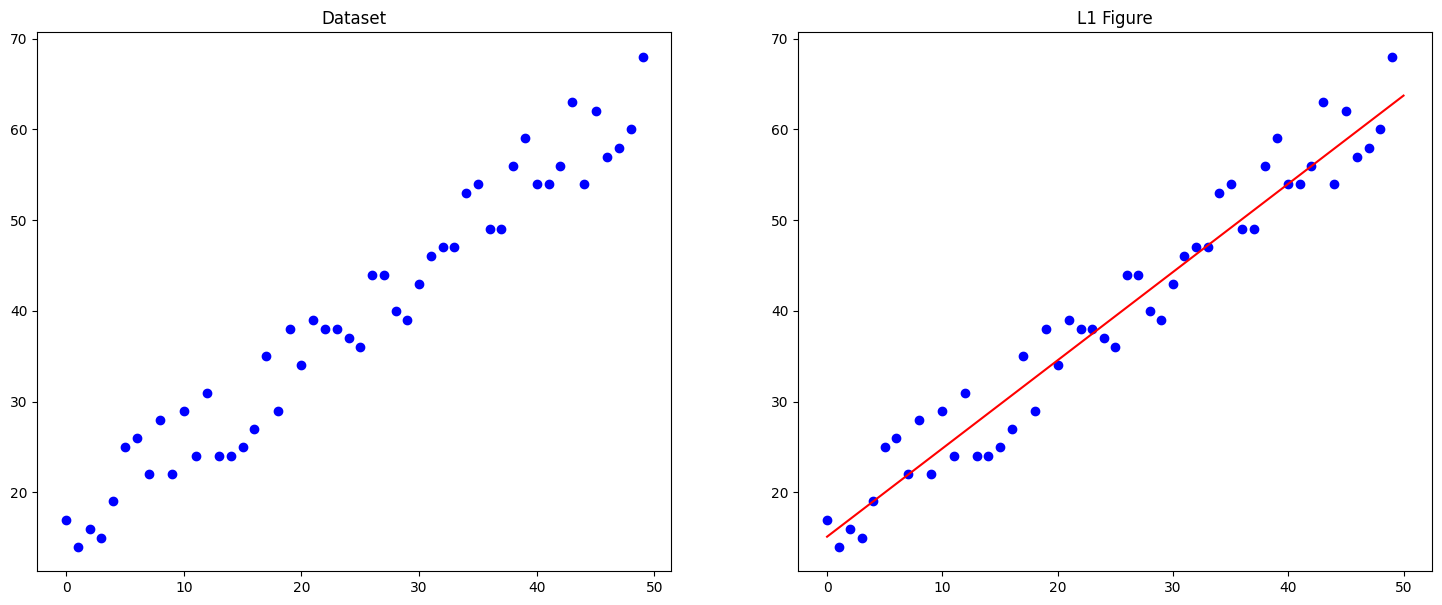

In [ ]:
def linear_func(x):
    return linear_res.x[1]*x + linear_res.x[0]

# DRAW GRAPH
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
for i in Data.dataset:
    ax1.scatter(i[0], i[1], c='blue')
ax1.set_title('Dataset')


for i in Data.dataset:
    ax2.scatter(i[0], i[1], c='blue')
x = np.linspace(0, 50)
ax2.plot(x, linear_func(x), color = 'red')
ax2.set_title('L1 Figure')

Ta có thể mở rộng và áp dụng Linear Programming để thực hiện Polynomial Regession.

Mô hình hồi quy đa thức (Polynomial Regression) có dạng:

\begin{align*}
    \hat{y} = & w_0 + w_1x_i + w_2{x_i}^2 + \cdots + w_m{x_i}^m, (i = 1, 2, \cdots, n)\\
    = & w^Tx, &
    x = & \begin{bmatrix}
        1 & x_1 & \cdots & x_n    
    \end{bmatrix}
\end{align*}

Dễ nhận thấy, $(x_i, y_i)$ là dữ liệu đầu vào. Do đó, ta chỉ đang tìm w bằng việc tối ưu $|y - w^Tx|$.

Xem xét kỹ về cách ta cài đặt hàm **linprog** để giải bài toán $L^1$ Regression bằng Linear Programming. Nhận thấy, ở đây ta chỉ tối ưu bài toán bằng việc tìm những giá trị $w_i$ và $t_i$. Từ đó, để thực hiện hồi quy đa thức (hay Polynomial Regession) ta chỉ cần thay đổi **A\_ub** như sau:

\begin{align*}
    \mathbf {A\_ub} =& \left[
    \begin{array}{rcccc}
        (1)_{n \times 1} & \vert &  X_{n \times m} & \vert &  I_{n \times n}\\
        \hline
         -(1)_{n \times 1} & \vert &  -X_{n \times m} & \vert &  -I_{n \times n}
    \end{array}\right]\\
    =& \left[
    \begin{matrix}
        1 & x_{11} & \cdots & (x_{1m})^m & 1 & 0 & \cdots & 0\\
        1 & x_{21} & \cdots & (x_{2m})^m & 0 & 1 & \cdots & 0\\
        \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & x_{n1} & \cdots & (x_{nm})^m & 0 & 0 & \cdots & 1\\
        -1 & -x_{11} & \cdots & -(x_{1m})^m & -1 & 0 & \cdots & 0\\
        -1 & -x_{21} & \cdots & -(x_{2m})^m & 0 & -1 & \cdots & 0\\
        \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots & \vdots\\
        -1 & -x_{n1} & \cdots & -(x_{nm})^m & 0 & 0 & \cdots & -1 \\
    \end{matrix}\right]
\end{align*}

Ở đây, ta tạo hàm sinh có dạng hàm bậc 3 như sau:

Có thể thêm outlier bằng cách điều chỉnh **self.outlier**.

In [ ]:
LIM = 1e5 + 696969
class GenPolynomial():

    def __init__(self):
        self.n = 200
        self.outlier = 0
        self.dataset = []
        for i in range(self.outlier):
            t = (random.randint(70, 90), random.randint(10, 20))
            self.dataset.append(t)

        self.n += self.outlier

    def f(self, x, k = 5):
        x -= 125
        y = x**3 + x**2 + x + k
        return y

    def gen(self):
        for i in range(self.n):
            t = (i, random.randint(self.f(i), self.f(i) + LIM))
            self.dataset.append(t)
        self.dataset = np.array(self.dataset)

Gọi **GenPolynomial()** để sinh dataset.

In [ ]:
Data = GenPolynomial()
Data.gen()
Data.dataset

array([[       0, -1177044],
       [       1, -1393965],
       [       2, -1525194],
       [       3, -1428255],
       [       4, -1130748],
       [       5, -1125826],
       [       6, -1504536],
       [       7, -1263663],
       [       8, -1018721],
       [       9, -1070867],
       [      10,  -745533],
       [      11, -1226365],
       [      12, -1252696],
       [      13,  -969347],
       [      14,  -980252],
       [      15, -1245673],
       [      16,  -919089],
       [      17, -1125979],
       [      18,  -902790],
       [      19,  -615423],
       [      20,  -912638],
       [      21,  -320935],
       [      22,  -864595],
       [      23,  -286226],
       [      24,  -396133],
       [      25,  -432110],
       [      26,  -679006],
       [      27,  -280955],
       [      28,  -487280],
       [      29,  -368424],
       [      30,  -617192],
       [      31,  -613540],
       [      32,  -520397],
       [      33,  -681433],
       [      

Ta tiếp tục cài đặt hàm **linprog** tương tự như phía trên, tuy nhiên, thay đổi vài thông số để có thể áp dụng được vào dataset mới.

In [ ]:
c = np.concatenate((np.zeros(4), np.ones(Data.n)))

b_ub = []
for i in Data.dataset:
    b_ub.append(i[1])
for i in Data.dataset:
    b_ub.append(-i[1])
b_ub = np.array(b_ub)

A_ub = []
t = -np.identity(Data.n)
t = np.concatenate((t, t), axis = 0)
for i in Data.dataset:
    A_ub.append([1, i[0], i[0]*i[0], i[0]**3])
for i in Data.dataset:
    A_ub.append([-1, -i[0], -i[0]*i[0], -(i[0]**3)])
A_ub = np.array(A_ub)
A_ub = np.concatenate((A_ub, t), axis = 1)

poly_res = linprog(
    c=c,
    A_ub=A_ub,
    b_ub=b_ub,
    bounds=(None, None),
)

Cuối cùng, ta có thể trực quan hoá dữ liệu bằng thư hiện **matplotlib**.

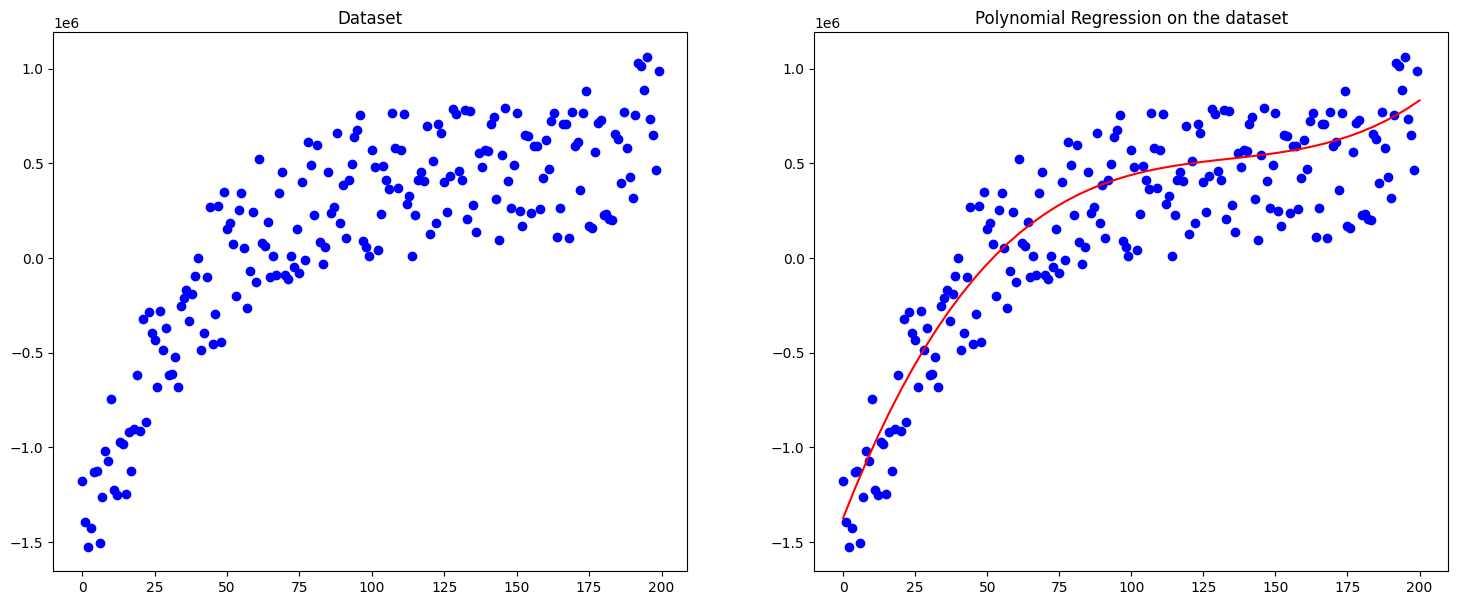

In [ ]:
def poly_func(x):
    return poly_res.x[3]*x*x*x + poly_res.x[2]*x*x + poly_res.x[1]*x + res.x[0]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

for i in Data.dataset:
    ax1.scatter(i[0], i[1], c='blue')
ax1.set_title('Dataset')

for i in Data.dataset:
    ax2.scatter(i[0], i[1], c='blue')
x = np.linspace(0, 200)
ax2.set_title('Polynomial Regression on the dataset')
ax2.plot(x, poly_func(x), c='red')

So sánh $L^1$-regression và $L^2$-regression

**Nhận xét :** So với $L^1$-regression thì $L^2$-regression rất nhạy với các điểm nhiễu. Do vậy, khi xuất hiện các điểm nhiễu thì độ chính xác của $L^1$-regression thường cao hơn so với $L^2$-regreesion.

Ta có nhận xét về 2 công thức $L^1$ và $L^2$ regression: \\
\begin{equation}
\mathcal{L}_{1}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \left| y_i - \mathbf{x}_i^T \mathbf{w} \right|   
\end{equation}
\begin{equation}
\mathcal{L}_{2}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \mathbf{x}_i^T \mathbf{w} \right)^2
\end{equation}

Ta nhận thấy, ở mỗi sai số thì $L^2$ bị bình phương lên nên nó sẽ dẫn đến sai số nhiều hơn so với $L^1$.

Để quan sát rõ hơn, ta có thể so sánh 2 dạng Regression trên bằng code.

Ở đây, ta không tập trung vào cách cài đặt $L^2$ Regression. Vì thế, ta sẽ sử dụng thư viện **sklearn.linear_model** để minh hoạ cho $L^2$ Regression và dùng hình ảnh đó để so sánh với $L^1$ Regression trên cùng bộ dataset.

Ta sẽ sinh dataset mới bằng cách thay đổi **self.outlier** và gọi lại hàm **GenLinear()**.

In [ ]:
Data = GenLinear()
Data.outlier = 20
Data.gen()

Data.dataset

array([[ 0, 18],
       [ 1, 21],
       [ 2, 17],
       [ 3, 17],
       [ 4, 20],
       [ 5, 22],
       [ 6, 26],
       [ 7, 27],
       [ 8, 24],
       [ 9, 25],
       [10, 25],
       [11, 29],
       [12, 22],
       [13, 27],
       [14, 31],
       [15, 29],
       [16, 30],
       [17, 27],
       [18, 35],
       [19, 32],
       [20, 31],
       [21, 33],
       [22, 34],
       [23, 42],
       [24, 42],
       [25, 42],
       [26, 43],
       [27, 45],
       [28, 45],
       [29, 45],
       [30, 43],
       [31, 49],
       [32, 48],
       [33, 53],
       [34, 49],
       [35, 49],
       [36, 56],
       [37, 48],
       [38, 54],
       [39, 59],
       [40, 55],
       [41, 61],
       [42, 58],
       [43, 56],
       [44, 54],
       [45, 65],
       [46, 58],
       [47, 58],
       [48, 66],
       [49, 62],
       [24,  3],
       [26,  8],
       [49,  5],
       [35,  6],
       [44,  0],
       [38,  1],
       [46, 10],
       [49,  7],
       [34, 10

Đến đây, ta có thể áp dụng các hàm sẵn có để trực quan hoá dữ liệu và so sánh sự khác nhau của $L^1$ Regression và $L^2$ Regression.

Text(0.5, 1.0, 'L2 Figure')

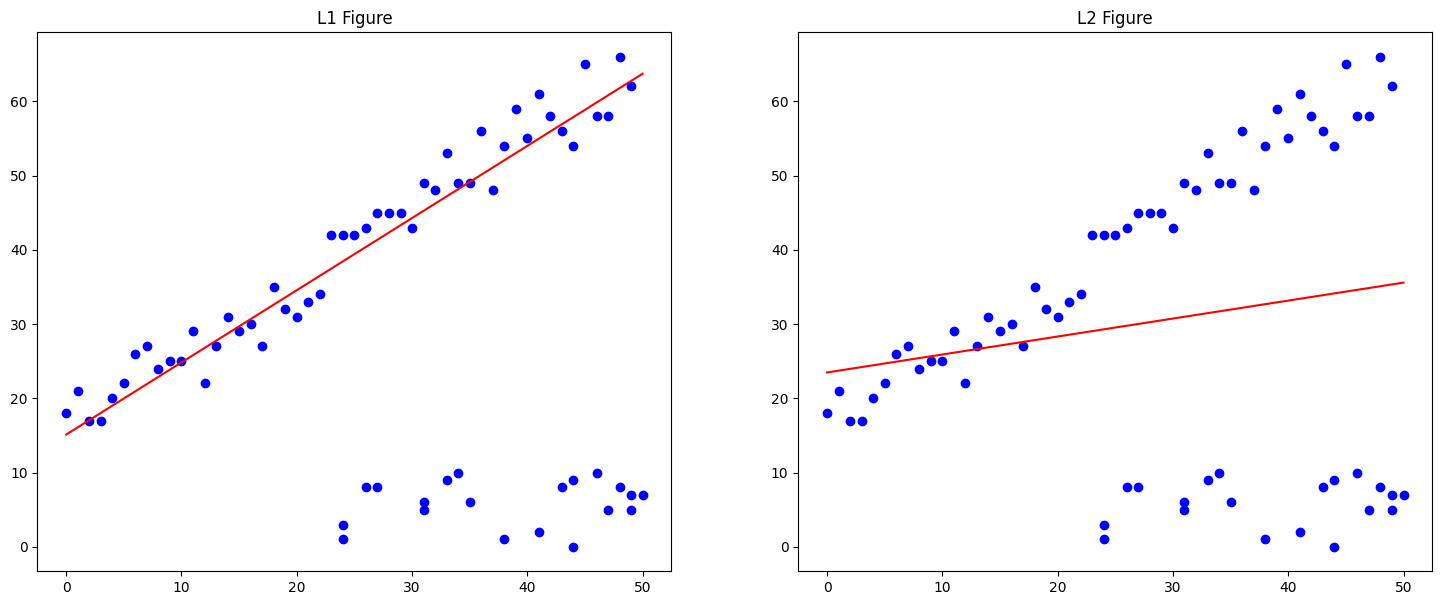

In [ ]:
from sklearn.linear_model import LinearRegression

# Building and fitting the Linear Regression model
linearModel = LinearRegression()
X_train = []
y_train = []
for i in Data.dataset:
    X_train.append(i[0])
    y_train.append(i[1])
y_train = np.reshape(y_train, (-1, 1))
X_train = np.reshape(X_train, (-1, 1))
linearModel.fit(X_train, y_train)

#Plottiong 2 figures here

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

for i in Data.dataset:
    ax1.scatter(i[0], i[1], c='blue')
x = np.linspace(0, 50)
ax1.plot(x, linear_func(x), c = 'red')
ax1.set_title('L1 Figure')

ax2.scatter(X_train, y_train, c='blue')
x = np.linspace(0, 50)
y_pred = linearModel.predict(x.reshape(-1, 1))
ax2.plot(x, y_pred, color = 'red')
ax2.set_title('L2 Figure')